# Data preparation

## Loading the datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
autolib.shape

(16085, 13)

In [ ]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# Checking for duplicated data
autolib.duplicated().sum()

0

In [ ]:
# Checking for Null values
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#replace ' ' with '_'
#replace ' ' with '_'
autolib.columns = autolib.columns.str.strip().str.replace(' ','_')
autolib.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
autolib

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## Tidying the dataset

Checking for outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


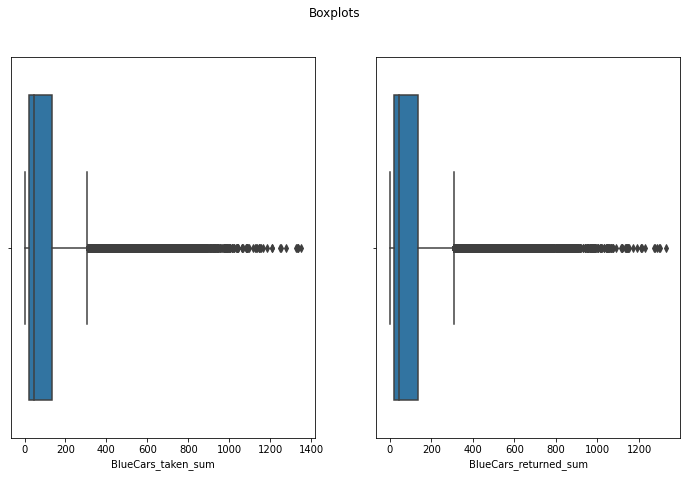

In [ ]:
# Checking for Outliers
#
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(autolib['BlueCars_returned_sum'], ax=ax2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


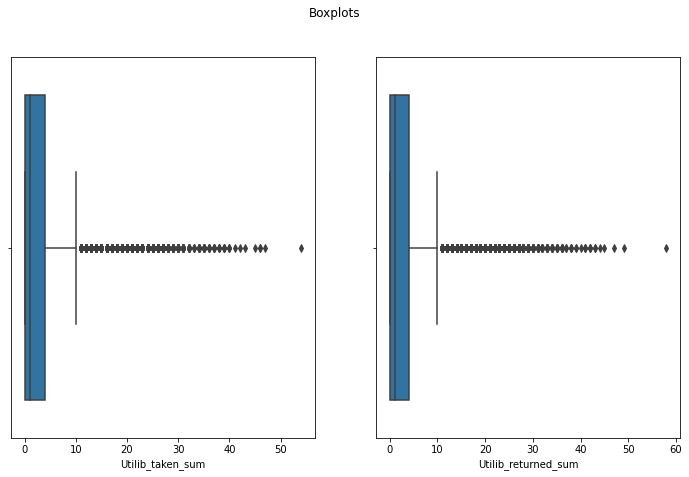

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib['Utilib_taken_sum'], ax=ax1)
sns.boxplot(autolib['Utilib_returned_sum'], ax=ax2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


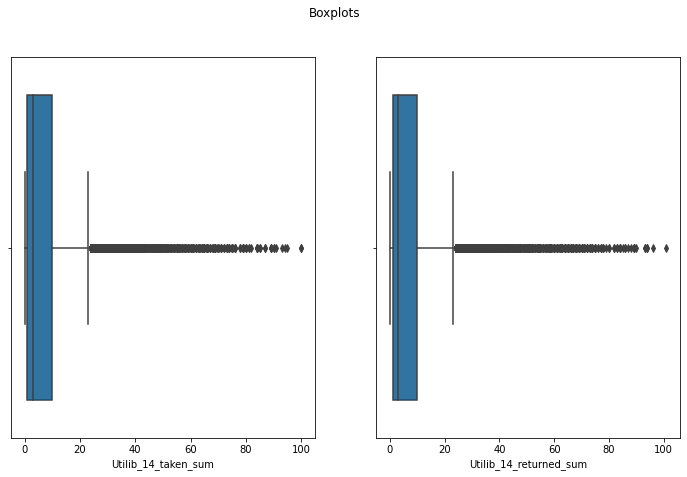

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib['Utilib_14_taken_sum'], ax=ax1)
sns.boxplot(autolib['Utilib_14_returned_sum'], ax=ax2)

In [ ]:
# Checking for Anomalies
#
q1 = autolib['BlueCars_taken_sum'].quantile(.25)
q3 = autolib['BlueCars_taken_sum'].quantile(.75)

iqr = q3 - q1
print(iqr)

115.0


In [ ]:
q11 = autolib['BlueCars_returned_sum'].quantile(.25)
q33 = autolib['BlueCars_returned_sum'].quantile(.75)

iqr = q33 - q11
print(iqr)

115.0


In [ ]:
q1 = autolib['Utilib_taken_sum'].quantile(.25)
q3 = autolib['Utilib_taken_sum'].quantile(.75)

iqr = q3 - q1
print(iqr)

4.0


In [ ]:
q1_r = autolib['Utilib_returned_sum'].quantile(.25)
q3_r = autolib['Utilib_returned_sum'].quantile(.75)

iqr_r = q3_r - q1_r
print(iqr_r)

4.0


In [ ]:
q1 = autolib['Utilib_14_taken_sum'].quantile(.25)
q3 = autolib['Utilib_14_taken_sum'].quantile(.75)

iqr = q3 - q1
print(iqr)

9.0


In [ ]:
q1 = autolib['Utilib_14_returned_sum'].quantile(.25)
q3 = autolib['Utilib_14_returned_sum'].quantile(.75)

iqr = q3 - q1
print(iqr)

9.0


## Exploratory Data Analysis (EDA)

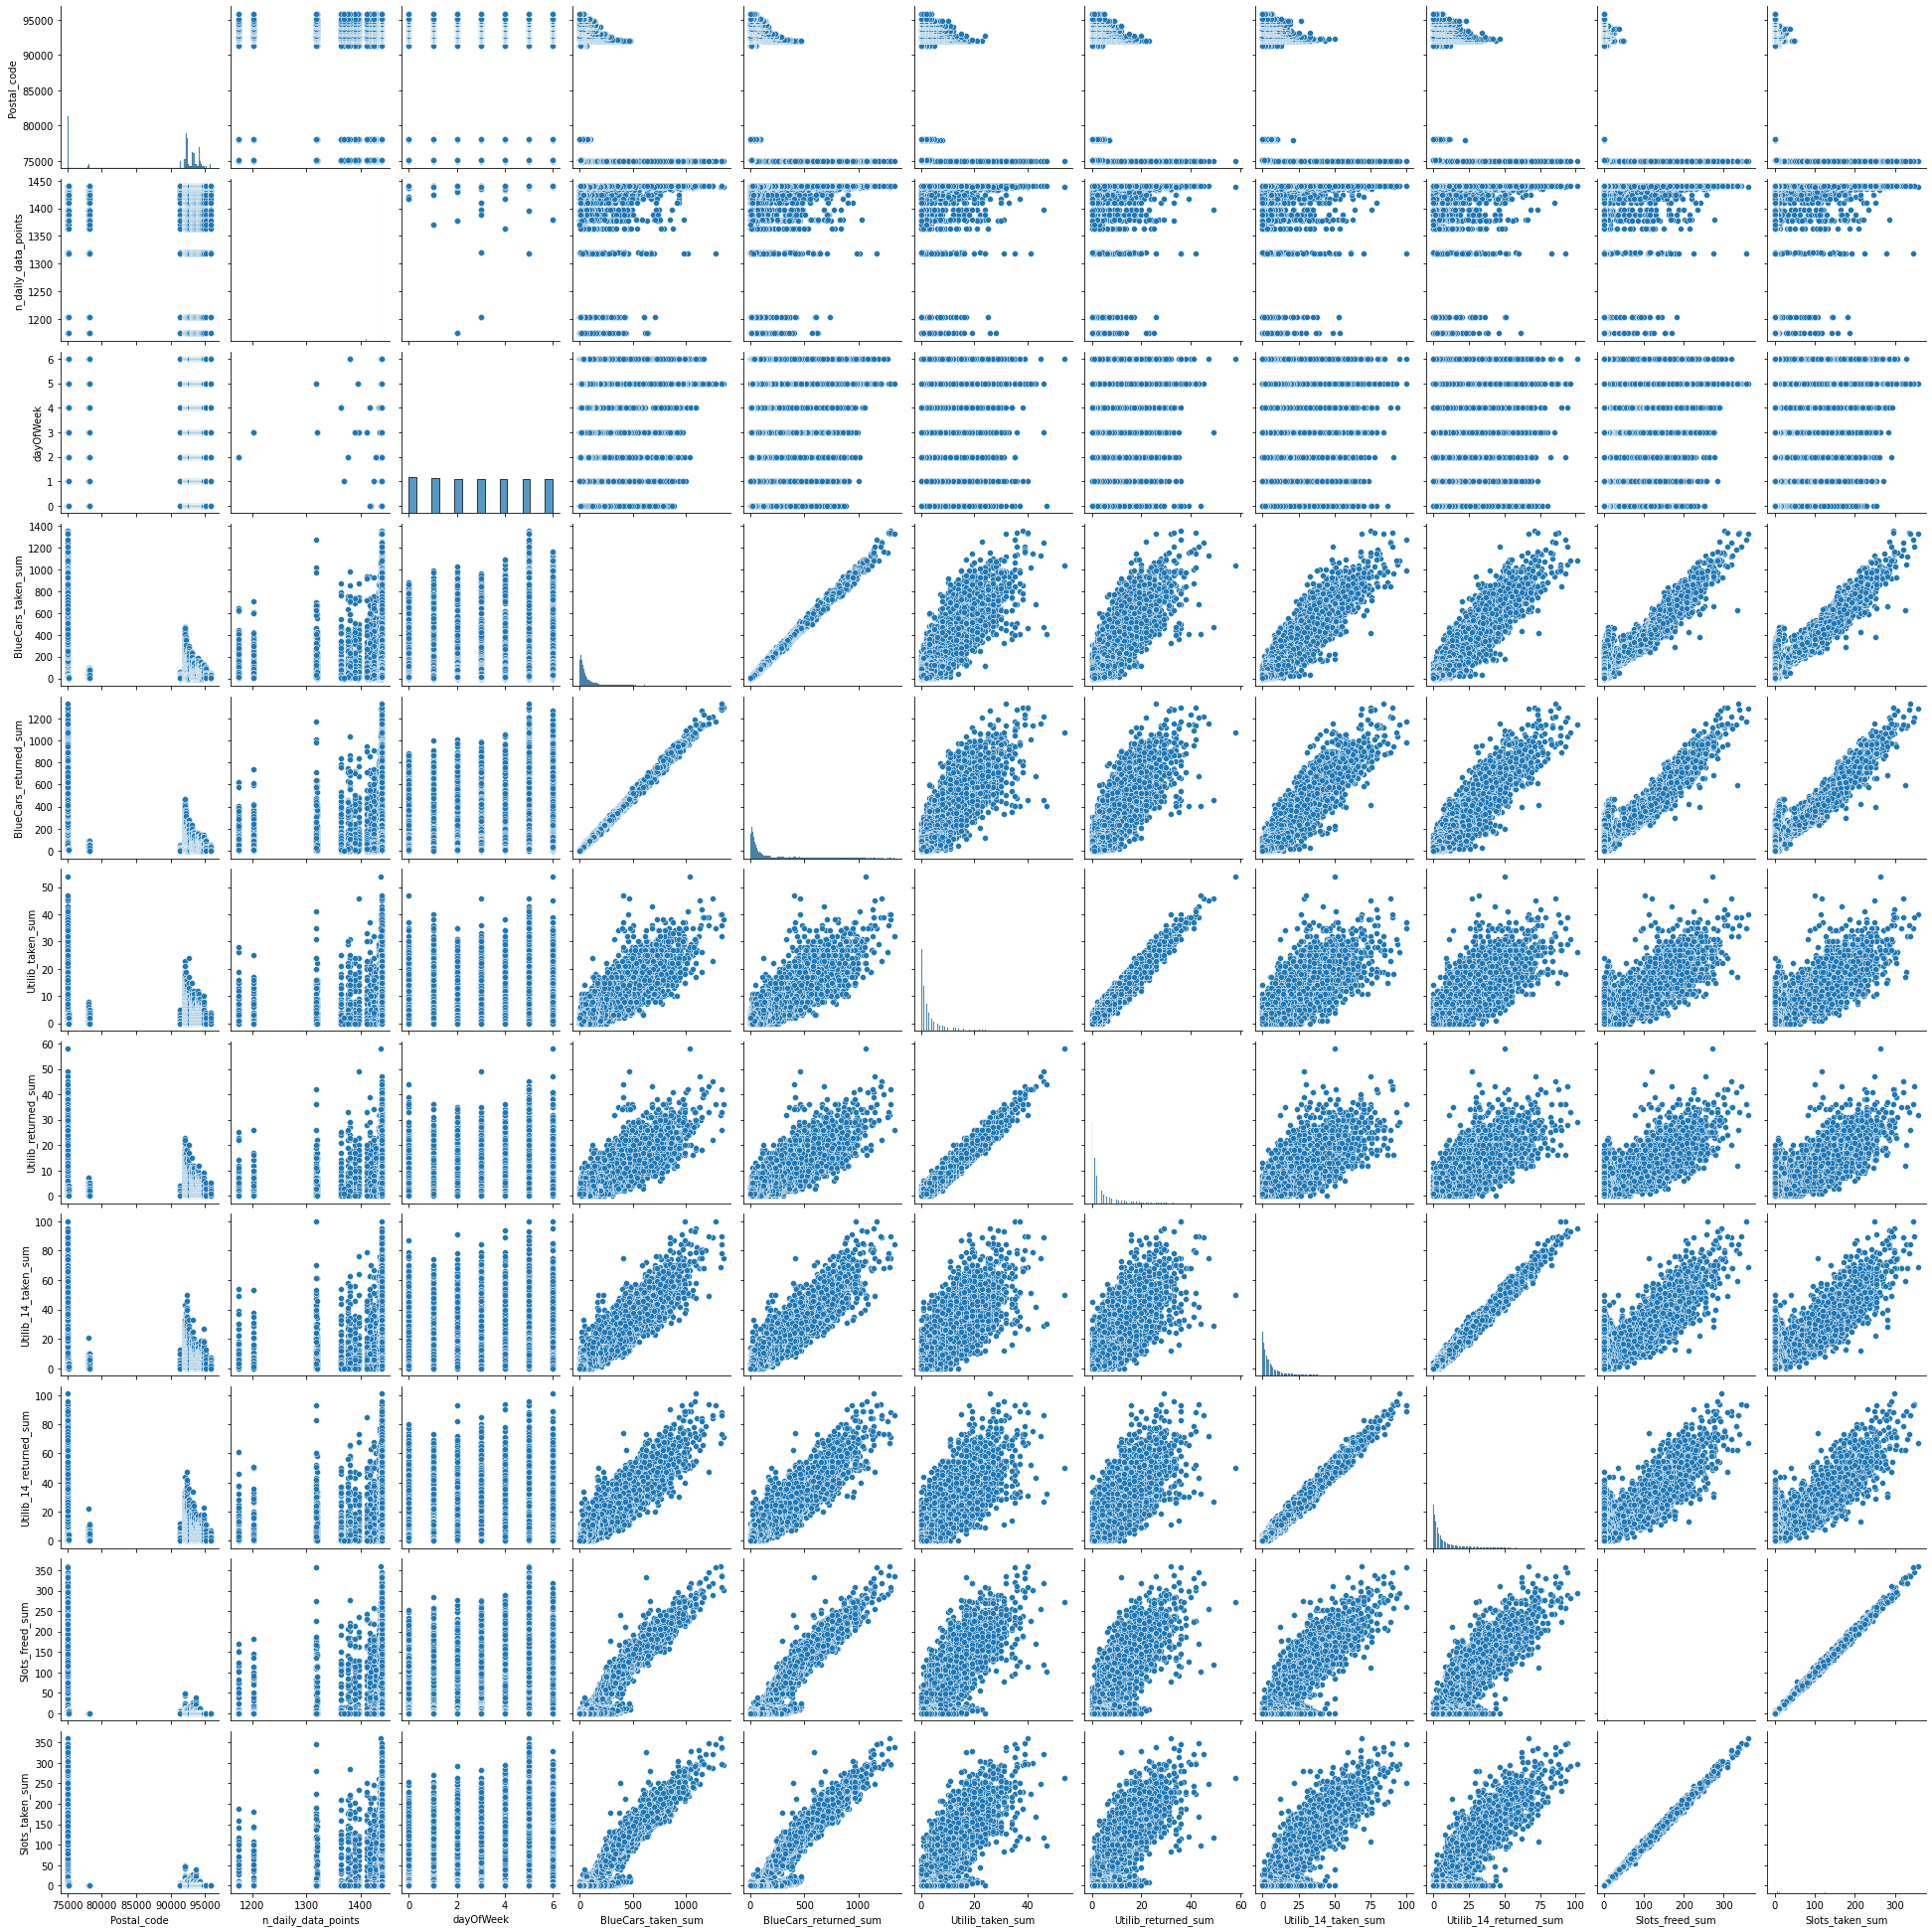

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib)
plt.show()

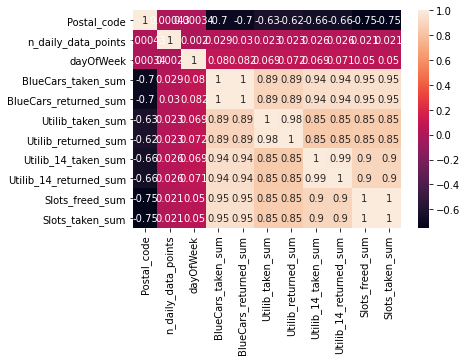

In [ ]:
sns.heatmap(autolib.corr(),annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


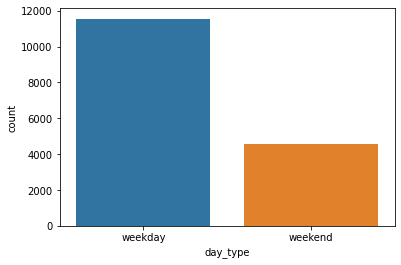

In [ ]:
# plotting count of the day type 
sns.countplot(autolib['day_type'])

# most cars are hired during the weekend.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


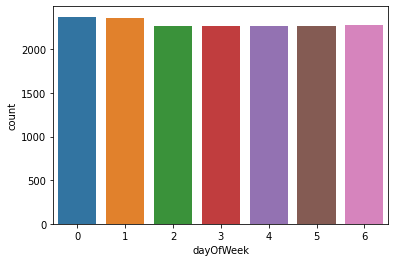

In [ ]:
sns.countplot(autolib['dayOfWeek'])

In [ ]:
bluetaken = autolib.groupby('Postal_code').BlueCars_taken_sum.mean()
bluetaken

Postal_code
75001    134.583333
75002    173.993590
75003    238.384615
75004    201.628205
75005    306.192308
            ...    
94700     33.897436
94800     80.038462
95100     23.993590
95870     15.243590
95880     15.948718
Name: BlueCars_taken_sum, Length: 104, dtype: float64

In [ ]:
autolib['Postal_code'].value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal_code, Length: 104, dtype: int64

Hypothesis Testing

Hypothesis testing:  The claim is that the total number of blue cars taken are not the same as returned cars on most days of the week

* Null Hypothesis -> Ho: U1 ≠ U2
* Alternative Hypothesis -> U1 = U2
 
 Significant value = 0.05

 Sample size = 100



In [ ]:
U1 = autolib['BlueCars_taken_sum'].sample(n=50, random_state=1)

In [ ]:
U2 = autolib['BlueCars_returned_sum'].sample(n=50, random_state=1)

In [ ]:
print(U1.mean())

print(U2.mean())

124.2
123.0


In [ ]:
# let us perfrom our ttest
from scipy import stats
tstat, pval = stats.ttest_rel(U1, U2)
print('t statistic is: ', tstat)
print('p value is: ', pval)

t statistic is:  0.9389138514207813
p value is:  0.35238036813155127


In [ ]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


The null hypothesis was accepted. The amount of blue cars taken are not the same number as those returned. 